In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.linear_model import LinearRegression

### Load images

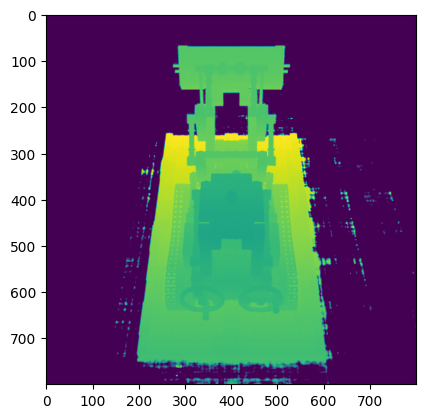

In [2]:
dir_path = "models/blender/lego/test_preds2/"
rgb_raw = np.load(dir_path+"000_rgb.npy")
depth_raw = np.load(dir_path+"000_depth.npy")
plt.imshow(depth_raw)

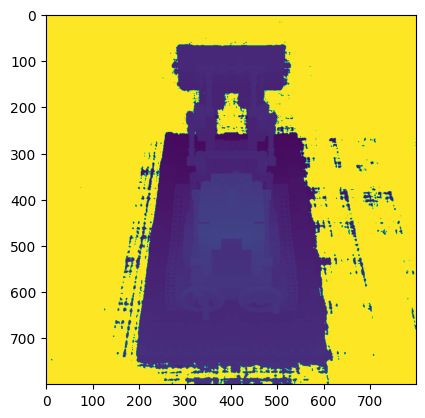

In [50]:
dir_path = "models/blender/lego/test_preds/"
rgb_model = np.array(Image.open(dir_path+"000.png"), np.float32)/255.
disp_model = np.array(Image.open(dir_path+"disp_000.png"), np.float32)/255.
plt.imshow(disp_model)

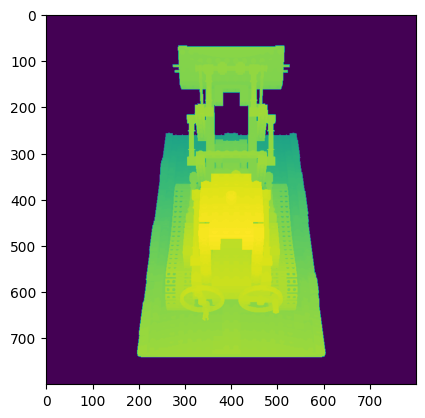

In [51]:
dir_path = "datasets/nerf_synthetic/lego/test/"
rgb_synth = np.array(Image.open(dir_path+"r_0.png"), np.float32)[:, :, :3]/255.
disp_synth = np.array(Image.open(dir_path+"r_0_depth_0001.png"), np.float32)[:, :, 0]/255.
plt.imshow(disp_synth)

In [52]:
mask = rgb_raw.mean(axis=-1)<(1-1e-4)
rgb_raw, depth_raw = rgb_raw[mask], depth_raw[mask]
rgb_model, disp_model = rgb_model[mask], disp_model[mask]
rgb_synth, disp_synth = rgb_synth[mask], disp_synth[mask]

### Test RGB

In [53]:
def plot_hist(img):
    plt.figure(figsize=(8,3))
    if img.ndim == 1:
        plt.hist(img,color="gray", alpha=0.7, bins=250)
    else:
        color = ['b','g','r']
        for i,c in enumerate(color):
            plt.hist(img[:, i].flatten(),color=c, alpha=0.5, bins=250)
    plt.yscale('log')
    plt.show()

def print_dist(data):
    print('mean:', data.mean(), 'std:', data.std(), 'max:', data.max(), 'min:', data.min())

mean: 0.41904607 std: 0.25463474 max: 1.0 min: 7.9381516e-07
mean: 0.41705865 std: 0.25456512 max: 1.0 min: 0.0
mean: 0.39155227 std: 0.24248277 max: 1.0 min: 0.0


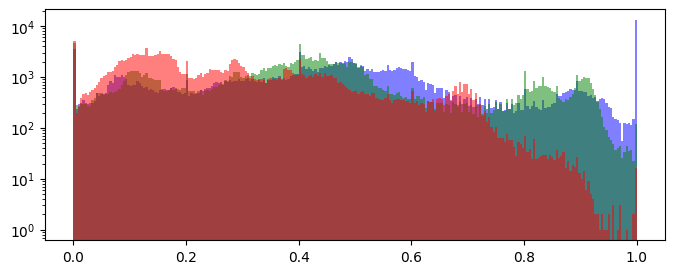

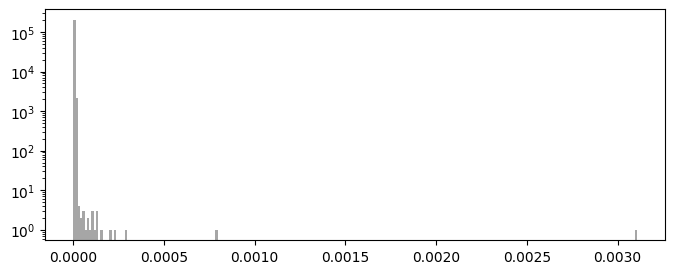

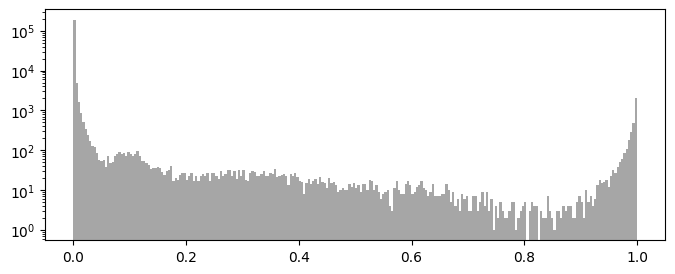

In [54]:
assert rgb_model.dtype == rgb_raw.dtype
assert rgb_synth.dtype == rgb_raw.dtype
assert rgb_model.shape == rgb_raw.shape
assert rgb_synth.shape == rgb_raw.shape
print_dist(rgb_raw)
print_dist(rgb_model)
print_dist(rgb_synth)
plot_hist(rgb_synth)
plot_hist(((rgb_raw-rgb_model)**2).mean(axis=-1))
plot_hist(((rgb_raw-rgb_synth)**2).mean(axis=-1))

### Depth test

In [55]:
assert disp_model.dtype == depth_raw.dtype
assert disp_synth.dtype == depth_raw.dtype
assert disp_model.shape == depth_raw.shape
assert disp_synth.shape == depth_raw.shape
print_dist(depth_raw)
print_dist(disp_model)
print_dist(disp_synth)
print_dist(1./(disp_synth+0.00001))

mean: 3.5920482 std: 0.6731664 max: 5.0224195 min: 0.0007061075
mean: 0.2725955 std: 0.030372132 max: 0.34117648 min: 0.18039216
mean: 0.5124173 std: 0.111201115 max: 0.63529414 min: 0.0
mean: 3471.0845 std: 18299.615 max: 100000.0 min: 1.5740492


0.27540002917893347
[  0.       -11.630453]


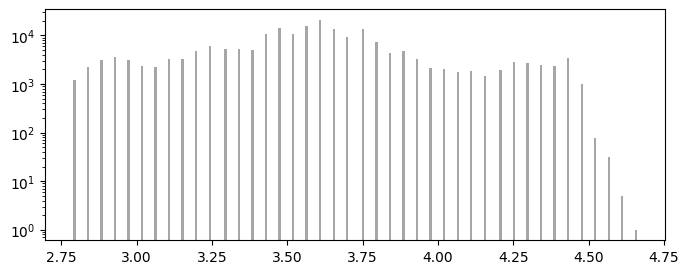

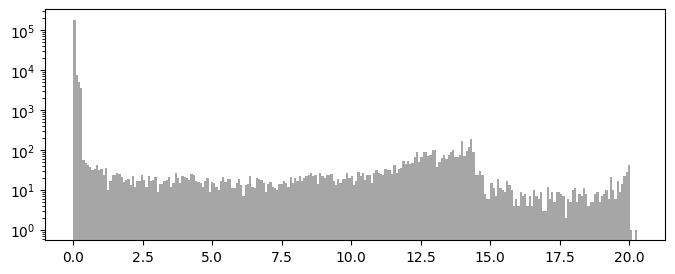

In [56]:
x, y = np.column_stack([np.ones_like(disp_model),disp_model]), depth_raw
reg = LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.coef_)
depth_model = reg.predict(x)
plot_hist(depth_model)
plot_hist(((depth_raw-depth_model)**2))

0.4146835780334941
[ 0.0000000e+00 -2.3688171e-06]


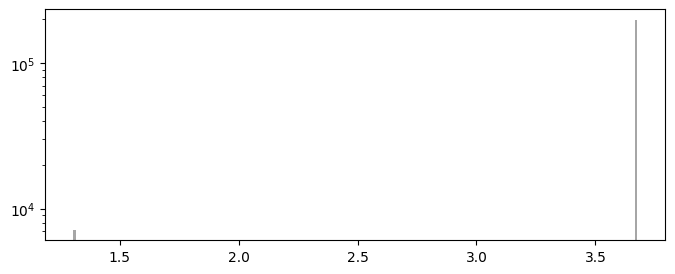

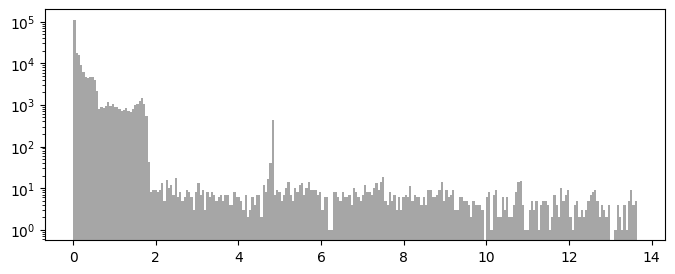

In [68]:
x, y = np.column_stack([np.ones_like(disp_synth),(disp_synth+1e-6)**(-1)]), depth_raw
reg = LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.coef_)
depth_synth = reg.predict(x)
plot_hist(depth_synth)
plot_hist(((depth_raw-depth_synth)**2))

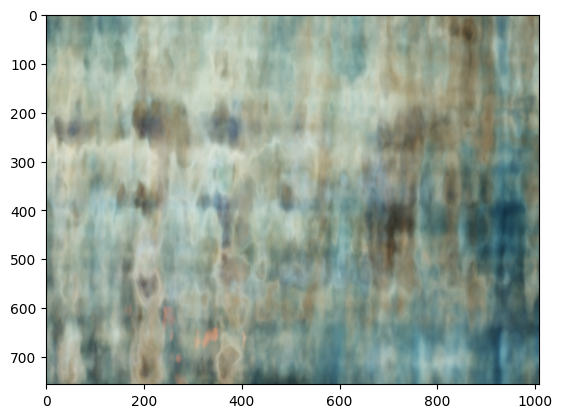

In [15]:
dir_path = "models/llff/fortress/test_preds2/"
rgb_raw = np.load(dir_path+"000_rgb.npy")
depth_raw = np.load(dir_path+"000_depth.npy")
plt.imshow(rgb_raw)

(756, 1008, 3)

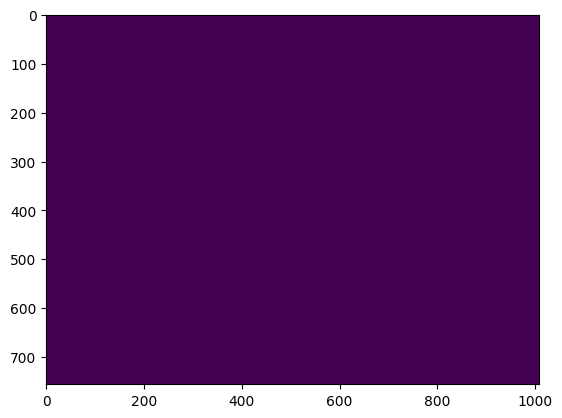

In [16]:
plt.imshow(depth_raw)
rgb_raw.shape

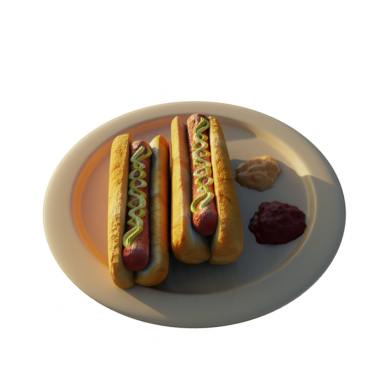

In [20]:
dir_path = "diagrams/"
rgb_true = np.load("models/blender/hotdog/test_preds2/"+"199_rgb.npy")
for i in range(0, 1000, 50):
    plt.imshow(np.load("diagrams/"+f"{i}_rgb.npy"))
    plt.imshow(rgb_true, alpha=0.6)
    plt.axis('off')
    plt.savefig(f'/hdd/{i}.png')

In [23]:

imgs = (Image.open(f'/hdd/{i}.png') for i in range(0, 1000, 50))
img = next(imgs)  # extract first image from iterator
img.save(fp="/hdd/out.gif", format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

In [24]:
del imgs
del img